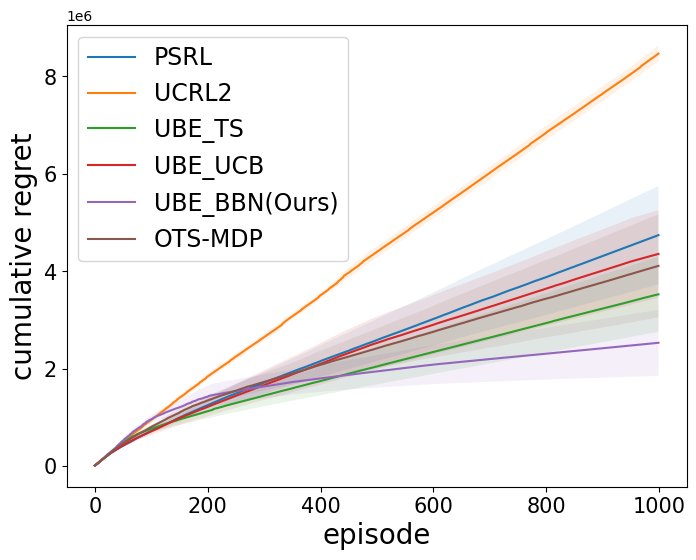

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')

if __name__ == '__main__':

    base_path_list = ['PSRL', 'UCRL2', 'UBE_TS', 'UBE_UCB', 'UBE_Bio', 'OTS']
    labels = ['PSRL', 'UCRL2', 'UBE_TS', 'UBE_UCB', 'UBE_BBN(Ours)', 'OTS-MDP']
    plt.figure(figsize=(8, 6))
    for id,base_path in enumerate(base_path_list):
        regret = []
        n = 10
        for i in range(1,n+1):
            Data = pd.read_csv('saved/sixarms_'+base_path + f'_seed{i}.csv')
            regret.append(Data['cumRegret'].to_list())
        regret = np.array(regret)
        regret_mean = np.mean(regret, axis=0)
        regret_std = np.std(regret, axis=0)
        plt.plot(regret_mean, label=labels[id])
        plt.fill_between(np.arange(0,1000), regret_mean+1.96*regret_std/np.sqrt(n), regret_mean-1.96*regret_std/np.sqrt(n), alpha=0.1)
        # plt.errorbar(x=np.arange(0,1000),y=regret_mean, yerr=regret_std, label=base_path)

    plt.legend(prop={'size': 17})
    plt.xlabel('episode', size=20)
    plt.ylabel('cumulative regret',size=20)
    plt.xticks(size=15)
    plt.yticks(size=15)

    plt.show()
